In [1]:
import matplotlib.pyplot as plt

In [90]:
import numpy as np

class ESN(object):
    """When we say W_hh, it means a weight matrix that accepts a hidden state and produce a new hidden state.
    Similarly, W_xh represents a weight matrix that accepts an input vector and produce a new hidden state. This
    notation can get messy as we get more variables later on with LSTM and I simplify the notation a little bit in
    LSTM notes.
    """
    def __init__(self, n_in, n_res, n_out, spectral_radius, sparsity, leaky_coeficient):
        """
            sparsity: value from 0 to 1(not included)
        """
        self.n_in = n_in
        self.n_res = n_res
        self.n_out = n_out
        self.spectral_radius = spectral_radius
        
        self.hidden_state = np.zeros(( n_res , 1))
        
        W_res = np.random.rand(n_res, n_res)
        
        # Input weight matrix
        self.W_in = np.random.uniform(-1, 1, (n_res, n_in + 1))  # +1 for bias term
        W_res[np.random.rand(*W_res.shape) > sparsity] = 0
        
        rho_W = np.max(np.abs(np.linalg.eigvals(W_res)))
        self.W_res = W_res * (self.spectral_radius / rho_W)
        self.leaky_coeficient = leaky_coeficient
        
    def reset(self):
        self.hidden_state = np.zeros(( self.n_res , 1))

    def forward(self, x):
        # The order of which you do dot product is entirely up to you. The gradient updates will take care itself
        # as long as the matrix dimension matches up.
        
        # x can be for example [0.3] for input dimension of 1 for single datapoint 
        # for vector datapoint 1d input can be for example [[0.1],[1.3],...,[0.3]]
        # w_in @ 

        ones_array = np.ones((x.shape[0], 1))
        u_n = np.concatenate((x, ones_array), axis = 1)
        x_n = np.tanh(self.W_in @ u_n.T + self.W_res @ self.hidden_state)

        self.hidden_state = (1- self.leaky_coeficient)*self.hidden_state + self.leaky_coeficient * x_n

        return self.hidden_state
        #return self.W_hy.dot(self.hidden_state) + self.By
        
    def reservoir_states(self, data, bias = True):
        reservoir_outputs = []
        if bias == True:
            for signal in data:
                res = self.forward(signal.reshape(-1,1))
                res_with_bias = np.vstack([np.ones(signal.shape[0]),res])
                reservoir_outputs.append(res_with_bias)
                esn.reset()
        else:
            for signal in data:
                res = self.forward(signal.reshape(-1,1))
                reservoir_outputs.append(res)
                esn.reset()
                
        return reservoir_outputs
    
    def ridge_regression(self, Y, X, beta):
        return np.dot(np.dot(Y, X.T),
                      np.linalg.pinv(np.dot(X, X.T) + np.dot(beta, np.eye(X.shape[0]))))

In [91]:
x = np.linspace(start=0,stop=1000, num=100000)
y = np.sin(x).reshape(-1,1)
y_target = np.cos(x).reshape(-1,1)

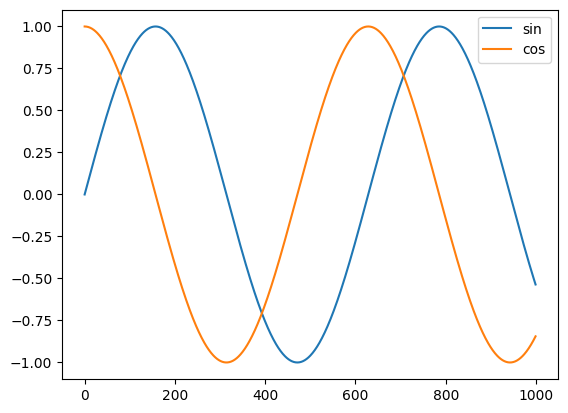

In [92]:
plt.plot(y[:1000],label='sin')
plt.plot(y_target[:1000],label='cos')
plt.legend()
plt.show()

In [93]:
esn = ESN(1, 100, 1, spectral_radius=1.25, sparsity = 0.1, leaky_coeficient=0.5)

In [111]:
res_states = esn.reservoir_states([y])[0]
w_out = esn.ridge_regression(y_target.T, res_states, 1)

In [112]:
w_out.shape

(1, 101)

In [115]:
res_states.shape

(101, 100000)

In [116]:
result = np.dot(w_out, res_states)

In [118]:
result.shape

(1, 100000)

In [120]:
result.flatten()

array([0.00166366, 0.00171129, 0.00175864, ..., 0.00132496, 0.00127864,
       0.00123239])

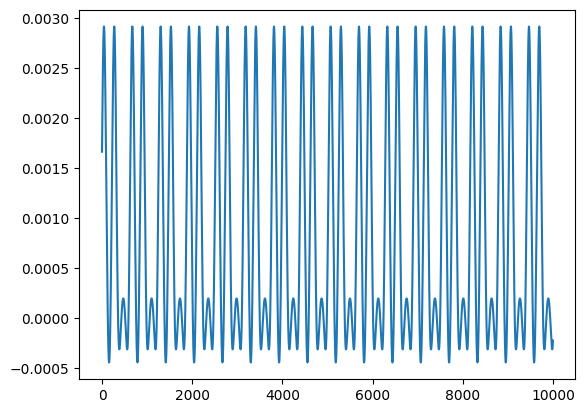

In [123]:
plt.plot(result.flatten()[:10000])

In [104]:
y_target.shape

(100000, 1)

In [101]:
w_out.shape

(101,)

In [10]:
# I can create a dataset of diferent sine functions
# we can change frequency as well as phase shift 

In [7]:
def generate_sine_wave(frequency, phase_shift, duration, sampling_rate, amplitude=1.0):
    """
    Generate a sine wave with specified parameters.

    Parameters:
    - frequency: Frequency of the sine wave in Hz
    - phase_shift: Phase shift of the sine wave in radians
    - duration: Duration of the sine wave in seconds
    - sampling_rate: Sampling rate in Hz (samples per second)
    - amplitude: Amplitude of the sine wave (default: 1.0)

    Returns:
    - t: Time array
    - y: Sine wave values
    """
    # Create a time array from 0 to the specified duration
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    
    # Generate sine wave using the given parameters
    y = amplitude * np.sin(2 * np.pi * frequency * t + phase_shift)
    
    return t, y

In [8]:
frequency = 5           # Frequency in Hz
phase_shift = np.pi / 4 # Phase shift in radians (e.g., 45 degrees)
duration = 1            # Duration in seconds
sampling_rate = 1000    # Sampling rate in Hz
amplitude = 1.0         # Amplitude of the sine wave

t, y = generate_sine_wave(frequency, phase_shift, duration, sampling_rate, amplitude)
#t, y_2 = generate_sine_wave(6, phase_shift, duration, sampling_rate, amplitude)
t, y_2 = generate_sine_wave(frequency, np.pi, duration, sampling_rate, amplitude)

In [9]:
frequency = 5           # Frequency in Hz
phase_shift = np.pi / 4 # Phase shift in radians (e.g., 45 degrees)
duration = 1            # Duration in seconds
sampling_rate = 1000    # Sampling rate in Hz
amplitude = 1.0         # Amplitude of the sine wave

t, y = generate_sine_wave(frequency, phase_shift, duration, sampling_rate, amplitude)
#t, y_2 = generate_sine_wave(6, phase_shift, duration, sampling_rate, amplitude)
t, y_2 = generate_sine_wave(frequency, np.pi, duration, sampling_rate, amplitude)
t, y_t = generate_sine_wave(frequency, phase_shift + 0.05, duration, sampling_rate, amplitude)

In [10]:
y_t.shape

(1000,)

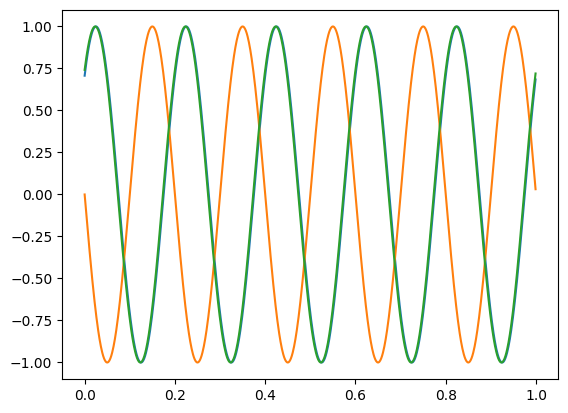

In [11]:
plt.plot(t,y)
plt.plot(t,y_2)
plt.plot(t,y_t)
plt.show()

In [14]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Ridge

In [15]:
root_mean_squared_error(y, y_2)

1.3065629648763764

In [16]:
y_target = np.sin(x-0.3).reshape(-1,1)

In [17]:
root_mean_squared_error(y, y_t)

0.0353516563265962

In [31]:
# TODO: lets create y_target as well
def generate_data_samples(n_data_samples,shift):
    data = []
    target = []
    for i in range(n_data_samples):
        #phase_shift = np.random.uniform(0, 2*np.pi)
        phase_shift = 0
        #frequency = np.random.uniform(3, 7)
        frequency = 5
        t, res = generate_sine_wave(frequency, phase_shift, duration, sampling_rate, amplitude)
        t, y = generate_sine_wave(frequency, phase_shift-shift, duration, sampling_rate, amplitude)
        data.append(res)
        target.append(y)
    return data, target

In [32]:
data, target = generate_data_samples(100, 0.5)

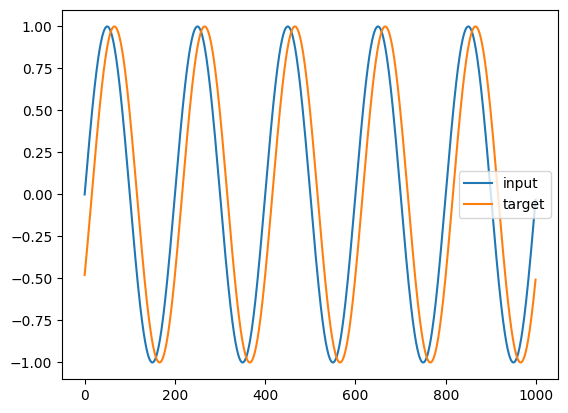

In [33]:
plt.plot(data[0],label='input')
plt.plot(target[0],label='target')
plt.legend()
plt.show()

In [88]:
esn = ESN(1, 10, 1, spectral_radius=1, sparsity = 0.5, leaky_coeficient=0.5)

reservoir_outputs = []
for signal in data:
    res = esn.forward(signal.reshape(-1,1))
    res_with_bias = np.vstack([np.ones(signal.shape[0]),res])
    reservoir_outputs.append(res_with_bias)
    esn.reset()

In [46]:
reservoir_states = np.concatenate(reservoir_outputs,axis=1)
ground_truth = np.concatenate(target)

In [52]:
print(reservoir_states.shape)
print(ground_truth.shape)

(10, 100000)
(100000,)


In [50]:
ones = np.ones(100_000)
biased_reservoir_states = np.vstack([ones,reservoir_states])
biased_reservoir_states.shape

(11, 100000)


$\mathbf{Y}\mathbf{X}^\top(\mathbf{X}\mathbf{X}^\top + \beta\mathbf{I})^{-1}$

In [56]:
# desired output dimension should be 1,11
def ridge_regression(Y, X, beta):
    return np.dot(np.dot(Y, X.T),
                  np.linalg.pinv(np.dot(X, X.T) + np.dot(beta, np.eye(X.shape[0]))))

In [59]:
readout = ridge_regression(ground_truth, biased_reservoir_states, 1)

In [63]:
test = np.vstack([np.ones(1000),
           reservoir_outputs[0]])

In [65]:
readout.shape

(11,)

In [68]:
result = (readout @ test)

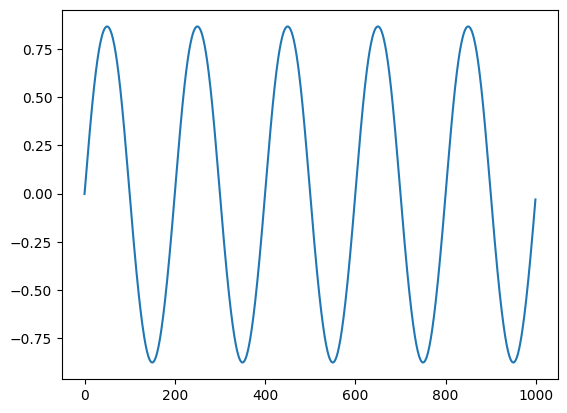

In [69]:
plt.plot(result)

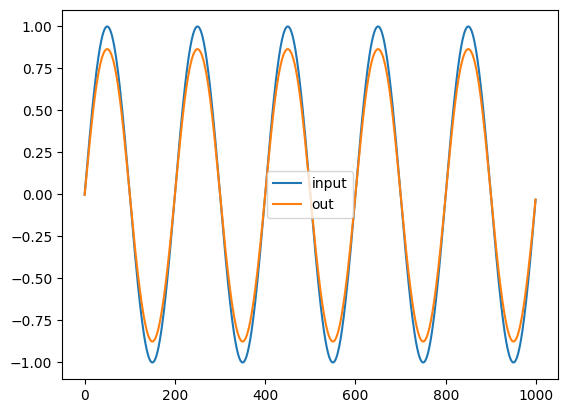

In [70]:
plt.plot(data[0],label='input')
plt.plot(result,label='out')
plt.legend()
plt.show()